In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
vec_list = np.array(np.meshgrid(np.linspace(-1.8,1.8,3), np.linspace(-0.8,2.8,3))).T.reshape(-1,2)
vec_list = np.append(vec_list, np.array([[0.0,0.0]]), axis = 0)

In [2]:
def energy(x, y):
    z = np.log((2*(y-x **2))**2 + (1 - x)**2 + 1)
    return z
def force(x, y):
    dx = (-16*x*(y-x**2)+2*x - 2)/(4*(y-x**2)**2 + (1 - x)**2 + 1)
    dy = (8*(y - x**2))/(4*(y-x**2)**2 + (1 - x)**2 + 1)
    return (-dx, -dy)
def force_len(f):
    return np.linalg.norm(f)

In [ ]:
#main body of iteration
iteration = 0
step = 0.04
i_n = []
fl_n = []
#vec_list_new = []
for v in vec_list:
    f = force(v[0], v[1])
    fl = force_len(f)
    vx_update = v[0] + f[0]*step
    vy_update = v[1] + f[1]*step
    v_update = (vx_update, vy_update)
    iteration += 1
    for iteration in range(1000):
        vx_update = v_update[0] + f[0]*step
        vy_update = v_update[1] + f[1]*step
        v_update = (vx_update, vy_update)
        f = force(v_update[0], v_update[1])
        fl = force_len(f)
        i_n.append(iteration)
        fl_n.append(fl)
        if fl <= 0.01:
            break
    
    #print(iteration)
    #print(f)

In [ ]:
plt.scatter(i_n, fl_n, s = 1)

In [ ]:
#test step

for step in np.arange(0,0.05,0.0005): #(0,05)
    print(step)
    iteration = 0
    iterations = []
    for v in vec_list:
        f = force(v[0], v[1])
        fl = force_len(f)
        vx_update = v[0] - f[0]*step
        vy_update = v[1] - f[1]*step
        v_update = (vx_update, vy_update)
        iteration += 1
        for iteration in range(1000):
            vx_update = v_update[0] - f[0]*step
            vy_update = v_update[1] - f[1]*step
            v_update = (vx_update, vy_update)
            f = force(v_update[0], v_update[1])
            fl = force_len(f)
            if fl <= 0.01:
                break
        #print(iteration)
        iterations.append(iteration)
    print(np.mean(iterations))

In [ ]:
#conjugate gradient algorithm
#main body of iteration
iteration = 0
step = 0.04
i_n = []
fl_n = []
#vec_list_new = []
for v in vec_list:
    f = force(v[0], v[1])
    fl = force_len(f)
    vx_update = v[0] + f[0]*step
    vy_update = v[1] + f[1]*step
    v_update = (vx_update, vy_update)
    iteration += 1
    for iteration in range(1000):
        vx_update = v_update[0] + f[0]*step
        vy_update = v_update[1] + f[1]*step
        v_update = (vx_update, vy_update)
        f = force(v_update[0], v_update[1])
        fl = force_len(f)
        i_n.append(iteration)
        fl_n.append(fl)
        if fl <= 0.01:
            break

In [5]:

p = (0, 0)
f0 = force(p[0], p[1])

step = 0.01
dot = 0.01
i = 0


x_update = p[0] + f0[0]*step
y_update = p[1] + f0[1]*step
p = (x_update, y_update)

while iteration in range(1000):
    x_update = p[0] + f0[0]*step
    y_update = p[1] + f0[1]*step
    i += 1
    f = force(p[0], p[1])
    if np.dot(f0, f) <= dot:
        p = (x_update, y_update)
        f = force(p[0], p[1])
        fl = force(f)
        if fl <= 0.01:
            break
        
print(i, fl)


NameError: name 'f' is not defined

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random



def force(x, y):
    dx = (-16*x*(y-x**2)+2*x - 2)/(4*(y-x**2)**2 + (1 - x)**2 + 1)
    dy = (8*(y - x**2))/(4*(y-x**2)**2 + (1 - x)**2 + 1)
    return np.array([-dx, -dy])

def calc_energy(x,y):
    return np.log((2*(y-x **2))**2 + (1 - x)**2 + 1)

class DescendToMinimum:
    def __init__(self, lr=0.05, stop_crit=0.01):
        self.iteration = 0
        self.lr = lr
        self.stop_crit = stop_crit

    def minimize(self):
        # start with random x and y position between -2,2
        x = np.random.uniform(-2,2)
        y = np.random.uniform(-1,3)
        alpha = 2
        print(f'starting point({x,y})')
        energy = calc_energy(x,y)
        while energy >= self.stop_crit and self.iteration < 1000:
            #calc force and magnitude
            f = force(x,y)
            mag_f = np.linalg.norm(f)

            # get new x,y by moving in negative gradient direction
            x = x + f[0] * self.lr
            y = y + f[1] * self.lr
            energy = calc_energy(x,y)

            self.iteration +=1
            alpha = alpha/self.iteration
        print(f'energy: {energy}')
        print(self.iteration)
        return x,y

    def line_search(self,x,y, direction, epsilon=0.01):
        lr = epsilon
        new_x = x + direction[0] * lr
        new_y = y + direction[1] * lr
        energy = calc_energy(x,y)
        new_energy = calc_energy(new_x, new_y)
        while new_energy <= energy:
            energy = new_energy
            lr = lr*2
            new_x = x + direction[0] * lr
            new_y = y + direction[1] * lr
            new_energy = calc_energy(new_x, new_y)
        # return step previous
        new_x = x + direction[0] * lr/2
        new_y = y + direction[1] * lr/2
        new_energy = energy
        return new_x, new_y, new_energy

    def sgd(self):
        x = np.random.uniform(-2,2)
        y = np.random.uniform(-1,3)
        print(f'starting point({x,y})')
        energy = calc_energy(x,y)
        while energy >= self.stop_crit and self.iteration < 1000:
            #calc force and magnitude
            f = force(x,y)
            # get new x,y by moving in negative gradient direction'
            x, y, energy = self.line_search(x,y,f,epsilon=0.001)
            self.iteration +=1
        print(f'converged in {self.iteration} steps at {x,y}')
        print(f'     : energy={energy}')
        return x,y

#%%

for i in range(10):
    print(" ")
    model = DescendToMinimum()
    min_x, min_y = model.minimize()
    print(min_x, min_y)

#%%

for i in range(10):
    print(" ")
    model = DescendToMinimum()
    min_x, min_y = model.sgd()

 
starting point((1.6966319958077953, 2.6859664540360195))
energy: 0.01708171535246348
1000
1.0126858916500154 0.9602113743332066
 
starting point((0.5386544359039065, 0.6696294255832651))
energy: 0.009612670568756058
41
0.9039116579425283 0.806735781449674
 
starting point((-0.6355201270761994, 0.5500943701406866))
energy: 0.009563354232561348
96
0.904158965938623 0.8072111398101098
 
starting point((-1.978573164970006, -0.06063443627127363))
energy: 0.009963680552528753
104
0.902169304802806 0.8033899682815766
 
starting point((0.6657888108409833, 1.4813048035658145))
energy: 0.018592376402446487
1000
0.9594150754455126 0.9858973807835569
 
starting point((1.6792372961485604, -0.2257826573542978))
energy: 0.009808919053028739
64
0.902933701351255 0.8048571330291565
 
starting point((0.7834769392675662, 1.2610782370396607))
energy: 0.01708171535246348
1000
1.0126858916500154 0.9602113743332066
 
starting point((1.7426593590247652, 1.9383726018344154))
energy: 0.018592376402446487
1000

In [ ]:
###gaussian pocess

In [19]:
import numpy as np
import matplotlib.pyplot as plt

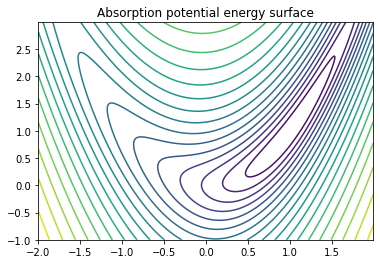

In [20]:
delta = 0.01 
x = np.arange(-2.0, 2.0, delta)
y = np.arange(-1.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z = np.log((2*(Y-X **2))**2 + (1 - X)**2 + 1)
levels = np.arange(0.0, 10.0, 0.5)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 18)
ax.set_title('Absorption potential energy surface')

plt.show()

In [21]:
vec_list = np.array(np.meshgrid(np.linspace(-1.8,1.8,3), np.linspace(-0.8,2.8,3))).T.reshape(-1,2)
vec_list = np.append(vec_list, np.array([[0.0,0.0]]), axis = 0)
print(vec_list)

[[-1.8 -0.8]
 [-1.8  1. ]
 [-1.8  2.8]
 [ 0.  -0.8]
 [ 0.   1. ]
 [ 0.   2.8]
 [ 1.8 -0.8]
 [ 1.8  1. ]
 [ 1.8  2.8]
 [ 0.   0. ]]


In [22]:
def energy(x, y):
    z = np.log((2*(y-x **2))**2 + (1 - x)**2 + 1)
    return z
def force(x, y):
    dx = (-16*x*(y-x**2)+2*x - 2)/(4*(y-x**2)**2 + (1 - x)**2 + 1)
    dy = (8*(y - x**2))/(4*(y-x**2)**2 + (1 - x)**2 + 1)
    return (-dx, -dy)
def force_len(f):
    return np.linalg.norm(f)

In [23]:
class GP:
    "Class used for training and predicting using Gaussian process"
    def __init__ (self, l, k0, sigma): 
        self.l = l
        self.k0 = k0
        self.sigma = sigma
       
    def calc_K(self, x_data1, x_data2):
        #x_data1 = x_data1.reshape(-1,1)
        #x_data2 = x_data2.reshape(-1,1)
        dist = np.sum(x_data1**2,axis=1).reshape(-1,1)+np.sum(x_data2**2,axis=1)-2*np.dot(x_data1, x_data2.T)
        K = self.k0*np.exp(-0.5*(dist)/(self.l)**2)
        #K =  np.array([[self.kernel(x,xx) for x in xp] for xx in xp])
        return K
    
    def calc_C(self, x_train):
        "Calculates C matrix. xp is sample x-values"
        K = self.calc_K(x_train,x_train)
        C = K + self.sigma**2*np.identity(len(K))
        return C
    
    def train(self, x_train, y_train):
        "xp is x-values of samples, tp is y-values of samples. Returns C invers and C invers dotted with t"
        C = self.calc_C(x_train)
        Cinv = np.linalg.inv(C)
        coef = np.matmul(Cinv, y_train.reshape(-1,1)) #didnt take yp into account
        return coef
   
    def predict(self, x_test, x_train, y_train):
        "xp is x-values of sample points, tp is y-values of sample points, grid is the grid to be fitted to"
        coef = self.train(x_train, y_train)
        k_mat_test = self.calc_K(x_test, x_train)
        return np.matmul(k_mat_test, coef)

In [72]:
#basic parameters
l = 2
k0 = 0.5
sigma = 0.005

In [73]:
model = GP(l,k0,sigma)

In [87]:
vec_list = np.array(np.meshgrid(np.linspace(-1.8,1.8,10), np.linspace(-0.8,2.8,10))).T.reshape(-1,2)
vec_list = np.append(vec_list, np.array([[0.0,0.0]]), axis = 0)
print(vec_list)

[[-1.80000000e+00 -8.00000000e-01]
 [-1.80000000e+00 -4.00000000e-01]
 [-1.80000000e+00 -1.11022302e-16]
 [-1.80000000e+00  4.00000000e-01]
 [-1.80000000e+00  8.00000000e-01]
 [-1.80000000e+00  1.20000000e+00]
 [-1.80000000e+00  1.60000000e+00]
 [-1.80000000e+00  2.00000000e+00]
 [-1.80000000e+00  2.40000000e+00]
 [-1.80000000e+00  2.80000000e+00]
 [-1.40000000e+00 -8.00000000e-01]
 [-1.40000000e+00 -4.00000000e-01]
 [-1.40000000e+00 -1.11022302e-16]
 [-1.40000000e+00  4.00000000e-01]
 [-1.40000000e+00  8.00000000e-01]
 [-1.40000000e+00  1.20000000e+00]
 [-1.40000000e+00  1.60000000e+00]
 [-1.40000000e+00  2.00000000e+00]
 [-1.40000000e+00  2.40000000e+00]
 [-1.40000000e+00  2.80000000e+00]
 [-1.00000000e+00 -8.00000000e-01]
 [-1.00000000e+00 -4.00000000e-01]
 [-1.00000000e+00 -1.11022302e-16]
 [-1.00000000e+00  4.00000000e-01]
 [-1.00000000e+00  8.00000000e-01]
 [-1.00000000e+00  1.20000000e+00]
 [-1.00000000e+00  1.60000000e+00]
 [-1.00000000e+00  2.00000000e+00]
 [-1.00000000e+00  2

In [88]:
#set the training/test sets
x_train = vec_list
y_train = np.array([energy(i[0], i[1]) for i in vec_list])
#print(x_train, y_train)
print(y_train)

[4.30577174 4.12452453 3.9284946  3.71606651 3.48597961 3.23814498
 2.97544793 2.70741    2.45636999 2.26326197 3.61712563 3.36861909
 3.09677147 2.80302093 2.49670346 2.20501636 1.98491106 1.91196919
 2.0194792  2.25992808 2.88814706 2.5525653  2.19722458 1.86252854
 1.64093658 1.64093658 1.86252854 2.19722458 2.5525653  2.88814706
 2.19080401 1.76992277 1.40570475 1.27155668 1.46658319 1.8535442
 2.27319748 2.66154542 3.00599939 3.30960827 1.6605872  1.16764072
 0.89461756 1.08464858 1.55822883 2.05699141 2.49933539 2.87955794
 3.20754791 3.49378872 1.49568674 0.88145081 0.49859109 0.76936721
 1.37381684 1.94910504 2.43136522 2.83358974 3.17464804 3.46917997
 1.87830407 1.24426986 0.51784096 0.15392208 0.6597972  1.38188465
 1.98929799 2.47808342 2.87955794 3.2178513  2.6361961  2.17928688
 1.60943791 0.89199804 0.14842001 0.14842001 0.89199804 1.60943791
 2.17928688 2.6361961  3.45411868 3.1543757  2.8049591  2.3882489
 1.87830407 1.24426986 0.51784096 0.15392208 0.6597972  1.381884

In [89]:
model.train(x_train, y_train)

array([[  3662.86637441],
       [ -1549.11442333],
       [ -3194.11729356],
       [ -2789.16816594],
       [ -1303.17348419],
       [   588.61759008],
       [  2144.27641527],
       [  2508.54134172],
       [  1207.25673354],
       [ -1049.213523  ],
       [ -2984.65083886],
       [  -419.3095397 ],
       [  3731.45129137],
       [  6331.22526451],
       [  5868.03592993],
       [  2594.61509759],
       [ -1666.90344123],
       [ -4474.77230839],
       [ -5146.97465956],
       [ -5717.78807287],
       [ -3037.19757524],
       [   752.34700276],
       [  2145.43652384],
       [  -914.97539571],
       [ -5725.40256504],
       [ -6892.09081754],
       [ -2742.29692099],
       [  3373.71662765],
       [  7642.10162347],
       [  7830.99161559],
       [    88.99645756],
       [  1688.61652553],
       [  -932.14272436],
       [ -4442.14202658],
       [ -4297.35730832],
       [ -2313.43579806],
       [  -404.95202666],
       [  1864.06448403],
       [  44

In [90]:
test_list = np.array(np.meshgrid(np.linspace(-1,1,30), np.linspace(-0.5,2,30))).T.reshape(-1,2)
test_list = np.append(test_list, np.array([[0.0,0.0]]), axis = 0)
#print(test_list)

In [91]:
x_test = test_list

In [99]:
predict=model.predict(x_test, x_train, y_train)

#for p in predict:
#for i in x_train:
#    if energy(i[0], i[1]) == min(predict):
        
index_min = np.argmin(predict)
print(index_min, x_test[index_min])

639 [0.44827586 0.27586207]


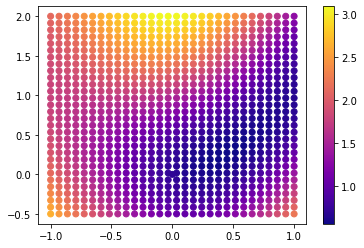

In [93]:
plt.scatter(x_test[:,0], x_test[:,1], c = predict.flatten(),  cmap='plasma')
#plt.scatter(x_train[:,0], x_train[:,1])
plt.colorbar()